Michał Dyzma

# Recruitment Task

Uncompress the data set [data](https://drive.google.com/file/d/1T7r2F3hpUkTS0c_aIRwkcVLCkKQrf5a1/view)  and load the data (data.csv). Prepare, analyse the data and
create a machine learning model using applicable libraries in Python 3 which would be able to predict
the target variable for cross validation set with the best results you can achieve. Defining appropriate
success metric is in the task scope.
The features represent results of different medical tests performed on patients. The target variable
means whether a patient is healthy (0) or sick (1). Therefore, when predicting the target variable the
model should, by all means, recognize sick patients (1) even if sometimes it would cause notifying a
healthy patient (0) that he might be potentially sick.
Avoid overfitting, visualise your learning curves, compare the efficiency of different algorithms and pick
the one which performs the best.
Your solution will be tested against the data which is not a part of the data set you received. So
consider using cross validation set for evaluating your model.
The solution should be created in the form of a Jupyter notebook, preferably with textual descriptions
of the steps performed and conclusions you have come to afterwards. Send us back the .ipynb file, all
additional required libraries you use which are not a part of the standard Anaconda Distribution should
be installed within the notebook using pip, e.g. ​ !​ pip install yourpackage
Things to consider:
* Model selection - choosing proper algorithms for the problem
* Appropriate choice of the success metric for given problem
* Visualisation when analysing both the data set and your model efficiency
* Feature selection: different features affect the target class on various levels, not all of them are
useful, moreover some of them can be redundant
* Code duplication: common parts should be refactored to functions
* Readability - create diagrams, write comments, show us you know what are you doing :)
NIce to have:
* When you reach satisfactory score of success metric, you can try to optimize hyperparameters
to get better results
* Gradient boosting
* Feature engineering

---

# Intorduction

## Technical aspects

Most libraries used in this notebook should be present in latest Anaconda bundle distribution (**Anaconda 5.1.0**) from [here](https://repo.continuum.io/archive/).

List of main packages used in the analysis: 


| Package     | Version     | Description                                            |
|-------------|-------------|--------------------------------------------------------|
| jupyter     | >=1.0.0     | Code interpreter in browser environment engine         |
| jupyterlab  | >=0.31.4    | Next generation notebook environment                   | 
| numpy       | >=1.14..0   | Efficient, vectorized matrix and vectror computations  |
| pandas      | >=0.22.0    | Data manipulation tool (tabular display, grouping)     |
| matplotlib  | >=2.1.2     | Basic visualization tool (2D plots)                    |
| seaborn     | >=0.8.1     | Statistical visualizations tool                        |
| scikit-learn| >=0.19.1    | machine learning algorithms                            |
| tensorflow  | >=1.8.0     | Neural nets framework                                  |
| tensorboard | >=1.8.0     | Advanced Neural nets visualization tool (comes with TF)|
| keras       | >=2.1.5     | High level API for tensorflow  neural nets             |
| graphviz    | >=2.38.0    | Basic graph visualization tool                         |
| watermark   | >=1.6.0     | Jupyter system info display                            |


Except tensorflow, keras and graphviz, all other packages should be part of Anaconda bundle. FInally watermark is nice addition to elegantly present basic system information.

## Packages installation

### System interpreter

In [ ]:
# batch install
!pip install -r requirements.txt

In [ ]:
# Manual for each package
!pip install -q -y -U watermark#-q quite, -y automatic yes, -U upgrade if package exists and newer is avaliable

In [ ]:
!pip install -q -y -U tensorflow

In [ ]:
!pip install -q -y -U graphviz

In [ ]:
!pip install -q -y -U keras

In [ ]:
#older versions of Anaconda may not have it, besides it is dynamically developed and having newest version is always a good idea.
!pip install -q -y -U jupyterlab

In [87]:
# Tool to list basic properties of the system and python environment
%load_ext watermark

In [88]:
%watermark -a "Michal Dyzma" -d -m -v -p jupyter,numpy,pandas,matplotlib,seaborn,sklearn,tensorflow,keras,graphviz

Using TensorFlow backend.


Michal Dyzma 2018-06-03 

CPython 3.6.5
IPython 6.4.0

jupyter 1.0.0
numpy 1.14.3
pandas 0.23.0
matplotlib 2.2.2
seaborn 0.8.1
sklearn 0.19.1
tensorflow 1.8.0
keras 2.1.5
graphviz 0.8.3

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


## General analytical process

1. Basic analysis
    * Task description analysis
    * EDA
        - None's
        - Basic statistics
        - Corelations
    * Choose algorithms
    * Choose metrics
2. Preprocessing
    * Cathegorical features encoding
    * Data standardization
    * Cross-validation
3. Learning
    * Train algorithms
    * Performance metrics
    * Hyperparameters optimization
4. Evaluation
    * Test data-set on trained algorithm

# Basic analysis

## Task description analysis

Based on task description I can infer few characteristics, which will define further analytical steps, i.e. machine learning field, narrow set of algorithms I will use to analyze this data-set, etc... Lets start:

1. I am dealing with supervised learning (outcome is given in target variable)
2. Problem at hand requires to predict category of the unknown input from discrete values: 0 and 1, ergo it is a binary classification problem (outcome can be 0 or 1, so there are two possible outcomes for each input). Only two cathegories in the output makes problem simpler, however most of the algorithms listed below is able to perform multi-class classification
3. Data is not big in sens of BIG DATA (most frequently used definition is: data, that do not fit single machine capabilities (RAM or HDD)).
4. Algorithm should be very accurate. Processing speed is not a factor.




There is handful of classical Machine Learning algorithms I could train to discriminate healthy and sick patients:

1. Logistic Regression
2. Naive Bayes Classifier
3. SVM (Support Vector Machine) (kernel or linear)
4. Decision Tree
5. Random Forest
6. Gradient Boosting Tree
7. Neural Networks

Because Neural Network is complex aproach, I will desribe it in dedicated section.

### Facts so far

1. Supervised, classification, accuracy oriented algorithm. 

But it is not over yet. Lets take a closer look at data...

## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

In [2]:
# Creating pandas DataFrame from given CSV file
data = pd.read_csv('data.csv', header=0, sep=',', dtype={'target': np.int8})# premature optimization is the root of all evil

In [3]:
data.head()

feat_1    feat_2    feat_3    feat_4    feat_5    feat_6    feat_7  \
0  0.079411  3.032344 -1.902289 -0.058186 -1.915972  0.068297  2.158826   
1 -2.852948  3.726466 -0.047115  2.162650 -2.392404  1.951167 -0.275296   
2 -0.766194 -0.031564 -1.426248  1.131341 -0.111717  0.410096 -2.432119   
3 -1.274741  0.472749  0.132853 -0.504397 -3.410913  1.784516 -0.700919   
4 -0.020826 -0.522089 -0.096930 -1.218122 -0.108291  0.886666 -2.124896   

     feat_8    feat_9   feat_10   feat_11   feat_12   feat_13 feat_14  \
0 -0.958097  0.801543 -0.058186  2.480564  0.802734  2.480564   cat_4   
1 -0.995117 -1.556067  2.162650  5.000197 -1.589794  5.000197   cat_5   
2  0.261055  0.707655  1.131341 -0.682214 -3.021595 -0.682214   cat_5   
3 -1.549686  0.753116 -0.504397  1.238764  0.385675  1.238764   cat_4   
4 -0.973548  0.023764 -1.218122  3.929908  1.562418  3.929908   cat_6   

    feat_15   feat_16   feat_17   feat_18   feat_19 feat_20  target  
0 -1.010379 -0.975528 -3.365908  0.150970  2.397233  cat_11       0  
1 -4.520324 -0.353982 -5.378310 -0.759440  1.474953  cat_10       0  
2 -3.274122 -0.204590  0.880774 -0.844211 -1.039709  cat_10       0  
3 -3.829808 -1.088646 -5.145597  0.281571  0.439359  cat_10       0  
4 -3.545589 -1.223566 -5.840541 -0.534844  0.400637  cat_10       0

In [4]:
data.describe(include='all')# .5 mln examples, ok not so big, not all numeric (feat_14 and 20), I will return to this table during data preparation step.

feat_1         feat_2         feat_3         feat_4  \
count   565080.000000  565080.000000  565080.000000  565080.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -0.804314       0.309331       0.001264       0.799966   
std          2.034485       2.435965       1.000494       2.128242   
min        -11.660426     -10.990198      -4.736719      -9.543619   
25%         -2.160961      -1.320364      -0.674225      -0.628651   
50%         -0.828124       0.348980       0.000159       0.814850   
75%          0.533029       1.975017       0.677020       2.244491   
max          8.916488      12.260167       4.729106      10.287707   

               feat_5         feat_6         feat_7         feat_8  \
count   565080.000000  565080.000000  565080.000000  565080.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -0.803501       0.804931      -0.803400       0.001616   
std          1.948099       1.572748       2.046131       1.746727   
min        -11.361049      -8.048636     -10.919959      -7.122733   
25%         -2.102968      -0.177961      -2.181176      -1.244238   
50%         -0.850551       0.860839      -0.826488      -0.108418   
75%          0.438132       1.852687       0.550564       1.172547   
max          9.521726       9.768174      10.365603       8.471885   

               feat_9        feat_10        feat_11        feat_12  \
count   565080.000000  565080.000000  565080.000000  565080.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.000912       0.799966       0.801588      -0.198285   
std          0.999693       2.128242       1.915200       1.929049   
min         -4.677650      -9.543619      -8.504597     -10.057134   
25%         -0.673259      -0.628651      -0.461506      -1.476658   
50%          0.001623       0.814850       0.831739      -0.111739   
75%          0.673614       2.244491       2.098924       1.162919   
max          4.985846      10.287707       9.886618       7.872549   

              feat_13 feat_14        feat_15        feat_16        feat_17  \
count   565080.000000  565080  565080.000000  565080.000000  565080.000000   
unique            NaN      10            NaN            NaN            NaN   
top               NaN   cat_5            NaN            NaN            NaN   
freq              NaN  212561            NaN            NaN            NaN   
mean         0.801588     NaN      -1.713143       0.001804      -1.606319   
std          1.915200     NaN       2.561553       1.001372       3.651745   
min         -8.504597     NaN     -14.368594      -5.059825     -18.103852   
25%         -0.461506     NaN      -3.428203      -0.673351      -4.122784   
50%          0.831739     NaN      -1.737835       0.002227      -1.719272   
75%          2.098924     NaN      -0.032071       0.674714       0.808788   
max          9.886618     NaN      11.619415       4.800260      16.090894   

              feat_18        feat_19 feat_20         target  
count   565080.000000  565080.000000  565080  565080.000000  
unique            NaN            NaN      19            NaN  
top               NaN            NaN  cat_10            NaN  
freq              NaN            NaN  113367            NaN  
mean         0.002119       0.002479     NaN       0.199835  
std          1.001865       1.000377     NaN       0.399877  
min         -4.732321      -4.827637     NaN       0.000000  
25%         -0.672595      -0.672435     NaN       0.000000

In [5]:
# Another way of getting table (data frame object) basic composition is info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565080 entries, 0 to 565079
Data columns (total 21 columns):
feat_1     565080 non-null float64
feat_2     565080 non-null float64
feat_3     565080 non-null float64
feat_4     565080 non-null float64
feat_5     565080 non-null float64
feat_6     565080 non-null float64
feat_7     565080 non-null float64
feat_8     565080 non-null float64
feat_9     565080 non-null float64
feat_10    565080 non-null float64
feat_11    565080 non-null float64
feat_12    565080 non-null float64
feat_13    565080 non-null float64
feat_14    565080 non-null object
feat_15    565080 non-null float64
feat_16    565080 non-null float64
feat_17    565080 non-null float64
feat_18    565080 non-null float64
feat_19    565080 non-null float64
feat_20    565080 non-null object
target     565080 non-null int8
dtypes: float64(18), int8(1), object(2)
memory usage: 86.8+ MB


I can see the are two columns with non numerical values. From first few rows I can safely assume this values are strings denoting cathegories names.

In [6]:
# Lets check if all examples  of feat_14 and feat_20 are strings
data[['feat_14', 'feat_20']].applymap(type).eq(str).all()

feat_14    True
feat_20    True
dtype: bool

In [7]:
# Any missing data?
data.isnull().sum().sum()

0

In [8]:
# Lets see data balance (how many exaples of sepecific class there is in the data set)
data.groupby('target').size()

target
0    452157
1    112923
dtype: int64

It looks like I have imbalanced classes here. Healthy group is four times bigger than sick. Ratio of class 0 to class 1 is 452157:112923, which is ca 4:1. Modest imbalanced classes. 

Now I will check correlation between features. 20x20 matrix, 500k points ech could take very long time and exhaust RAM memory on standard machine. I will take sample of 1000 points to create corelation matrix.

In [9]:
# Correlation matrix. Due to features number and data size I am taking 1000 random values from the DF, to speed up visualization and reduce picture size.
samples = data.sample(n=1000)

In [10]:
# Does samples keep 4:1 ratio for target?
samples.groupby('target').size()

target
0    813
1    187
dtype: int64

In [11]:
# Correlation matrix. Due to features number and data size I am taking 1000 random values from the DF, to speed up visualization and reduce picture size.
samples = data.sample(n=1000)

<Figure size 432x288 with 0 Axes>

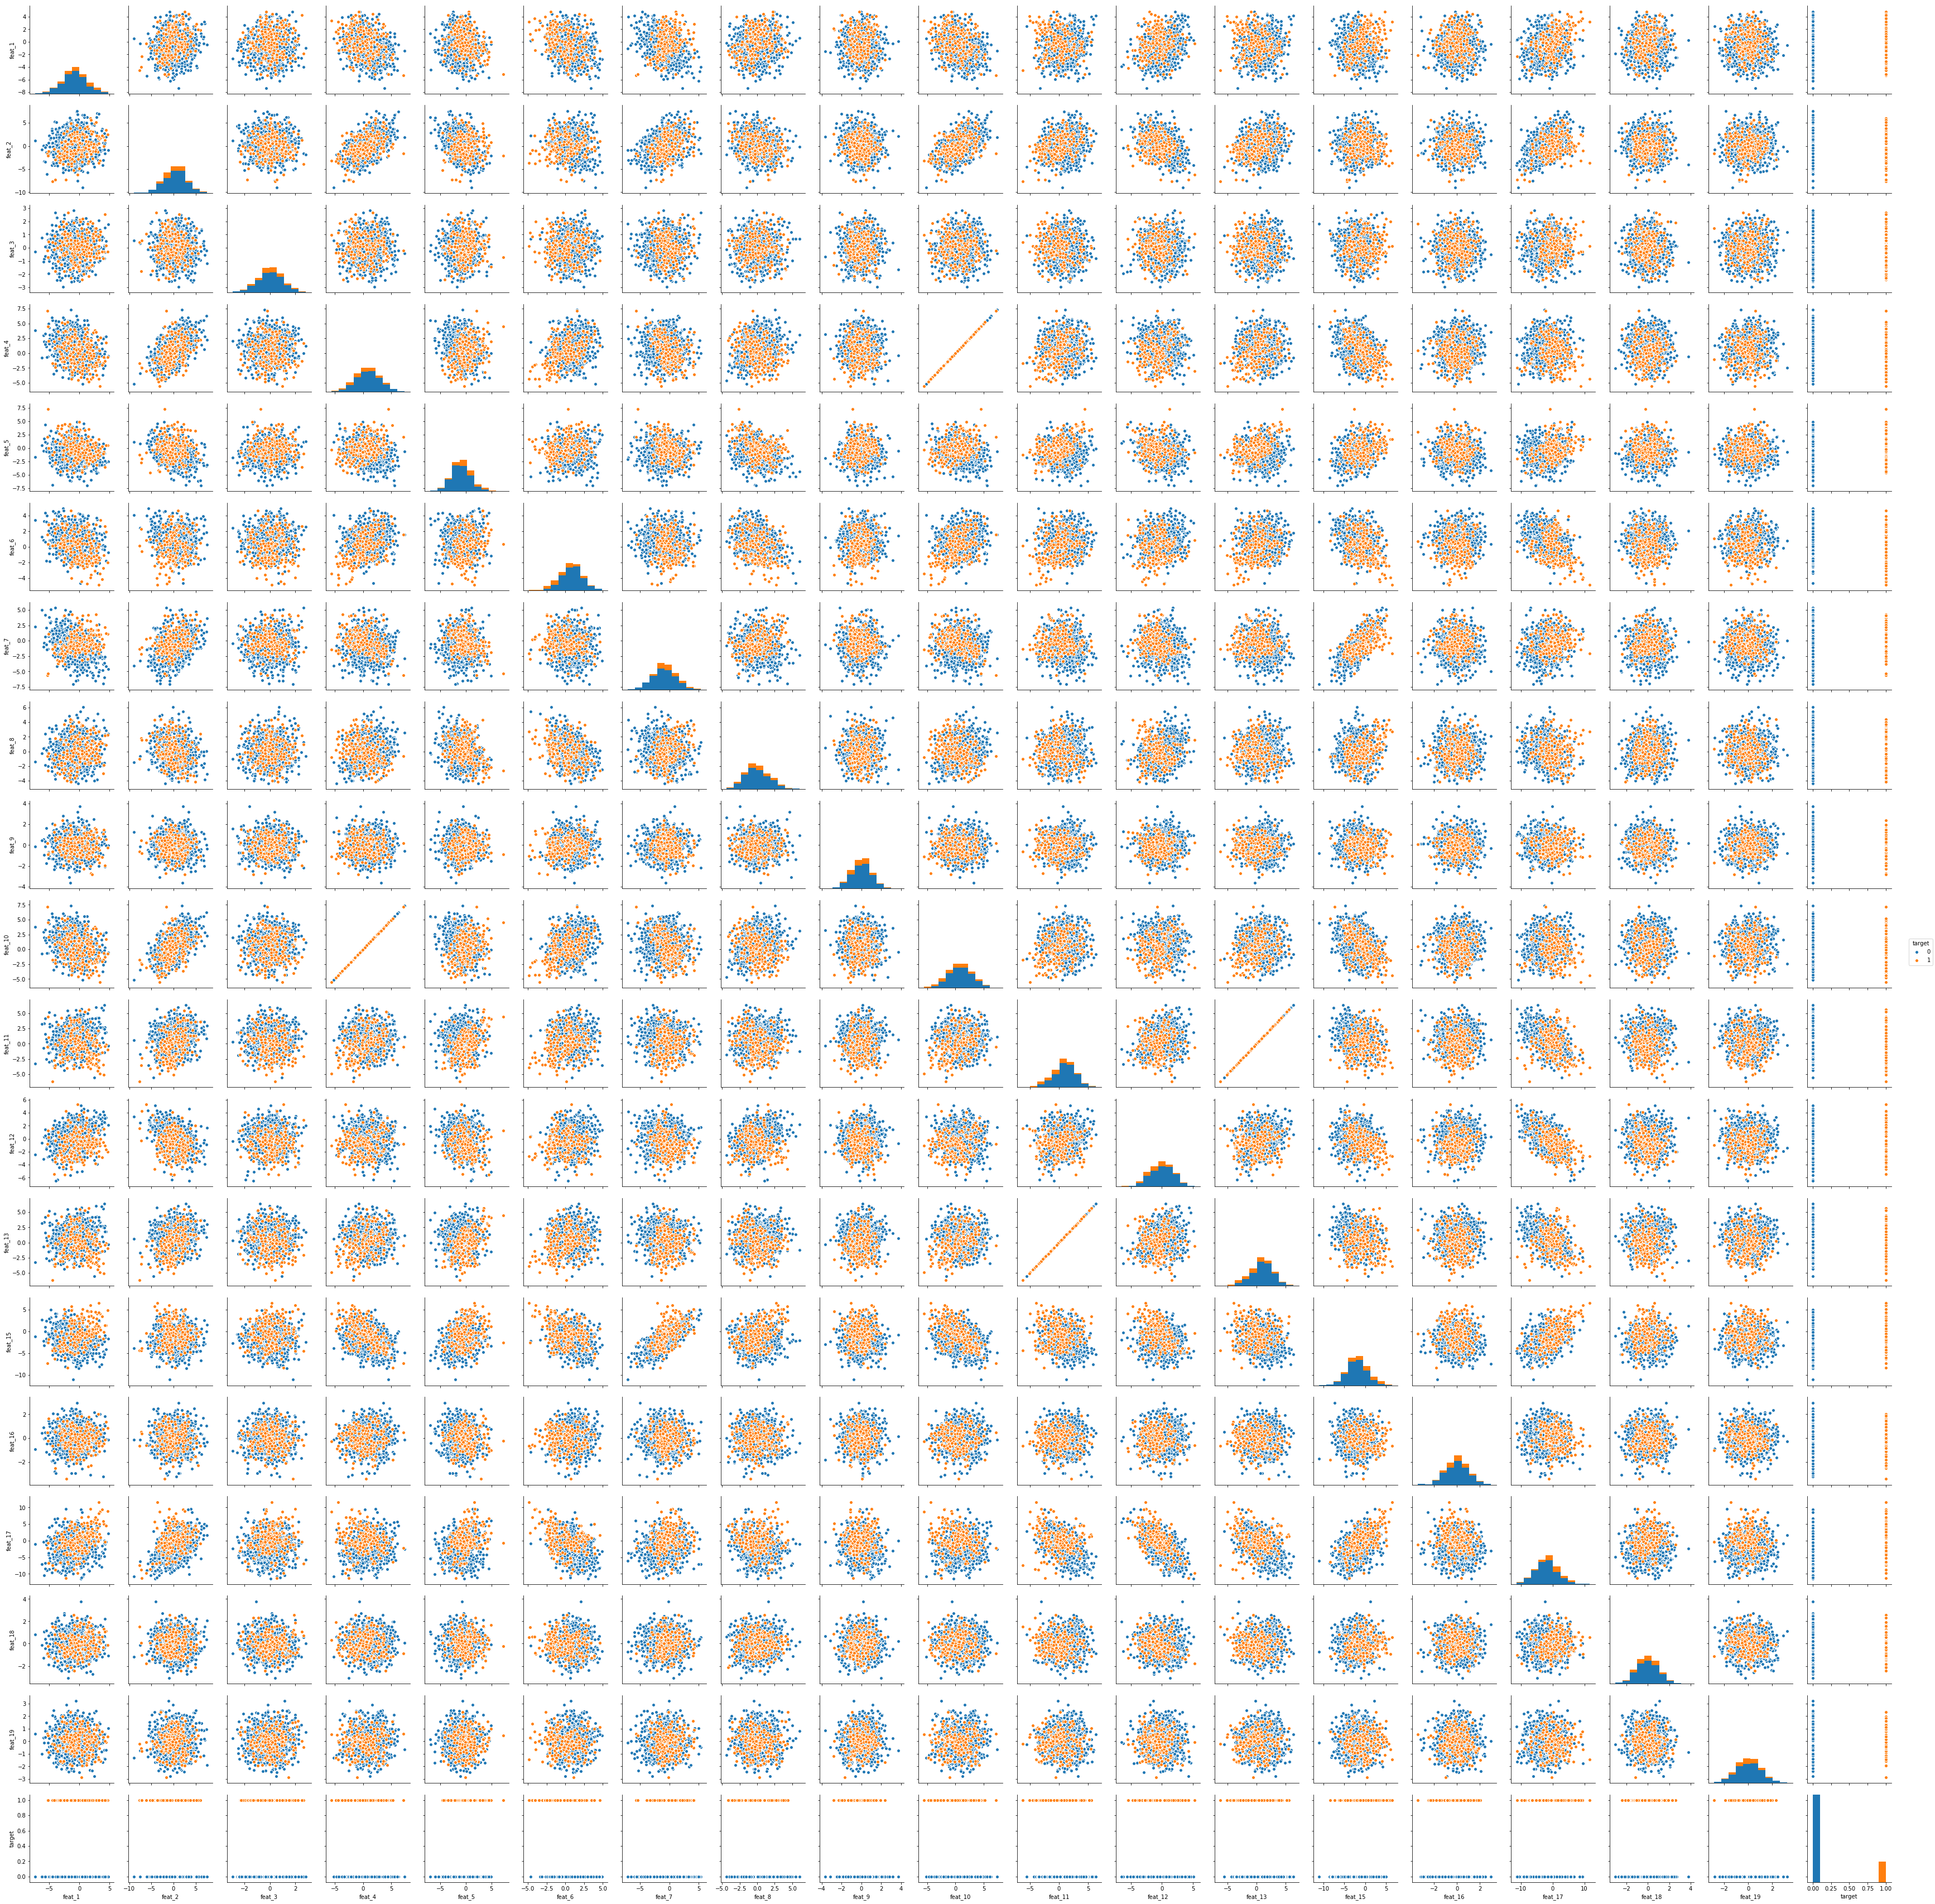

In [12]:
# This particular step may take few minutes. After all it is 441 graphs. 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.clf()
# sns.set(style="ticks", color_codes=True)
corr = sns.pairplot(samples, hue='target')
plt.savefig('correlation.png', dpi=72)
plt.show()

Blue are zeroes (healthy), orange are ones (sick).

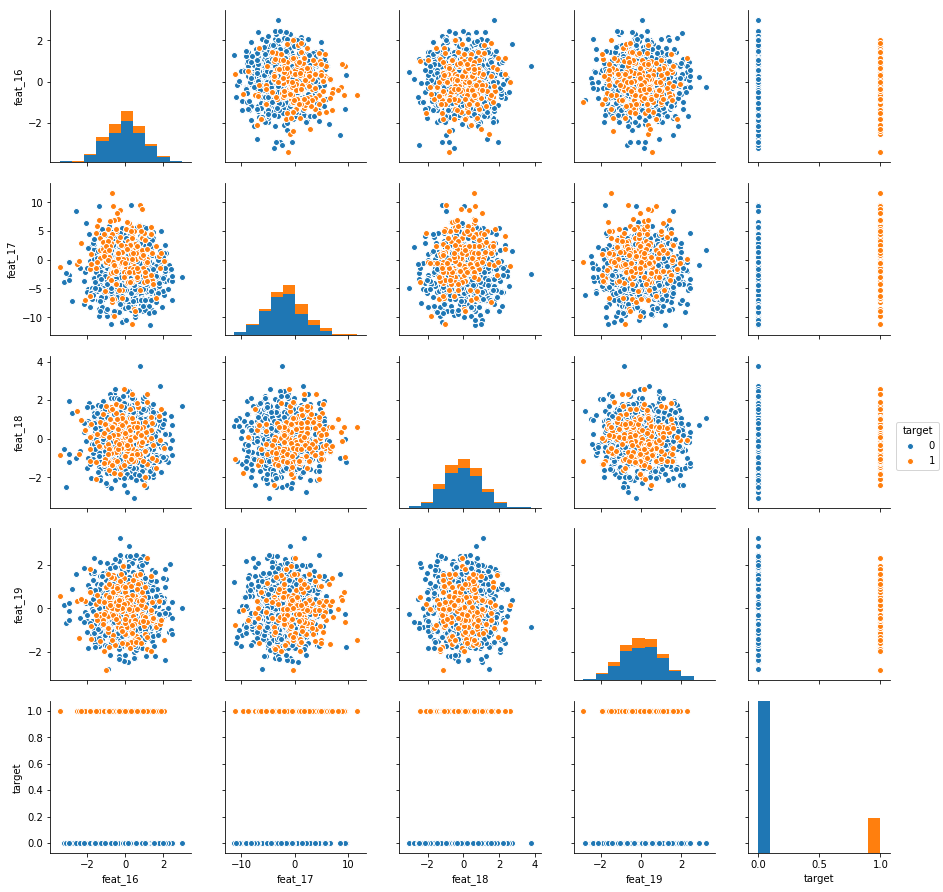

In [13]:
#If MemoryError appeared, there are two options: 1) set higher limits in notebook backend, 2) narrow amout of plots.
# Lets take last five inlcuding "target, which discriminates data points  for sick and healthy"
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
small_samples = samples[samples.columns[-6:]]

corr = sns.pairplot(small_samples, hue='target')

## Choose algorithm


To recall, I propose seven candidate algorithms:

1. Logistic Regression
2. Naive Bayes Classifier
3. SVM (Support Vector Machine) (kernel or linear)
4. Decision Tree
5. Random Forest
6. Gradient Boosting Tree (AdaBoost)
7. Neural Networks


Based on EDA analysis done so far I can narrow list of algorithms and choose proper metrics

1. Imbalanced data set (see choose metrics)
2. Target classes unable to separate using linear model 
3. Cathegorical predictors present (dataset needs preparation one-hot encoding)
4. Spotted two strong correlation between features (one from each pair of features can be removed without information loss)
5. less than 50 predictors (when correlated ones are removed) should perform fast on any algorithm listed above

Which leads me to the following conclusions:
1. Logistic regression is not good in this case (works well on linearry separable datasets)
2. SVM with linear kernel is not good as well (same reason)
3. Unbalanced data set makes Naive Bayse classifier unfit (it would calculate posteriori probabilities based on apriori distribution, which could lead to the preference of more frequently present class. This is also affecting metrics)


Considering number of features and examples, data is not very big. But very slow algorithms like SVM may suffer a lot. SVM scales badly with number of examples ($O(N^3)$ at worst or $O(N^2)$ for efficient implememntation), which in my case gives range of cycles from $565080^2$ to $565080^3$, which is $3.19x10^{11}$ to $1.8x10^{17}$). Taking  typical machine with processor working at speed of 3 GHz (and devoting all processor cyckles to it), it could take from little bit over 1.7 min (106 sconds) to raughly **696 days**. Unless subsampled and complex feature engineering is done, this algorithm is too slow.

I will rather use accurate and fast, that is why I will try SVM with rbf kernel on subset of data (it is simple, and very accurate). It also requires very complex feature engineering. 

Obviously I will try decision tree because data is super non-lineary separable. And because decision trees tend to be much faster than SVM, but easly overfit, I would rather go towards more robust, yet accurate derivative, which is either Gradient Boosting Tree or Random Forest. Additonally with decision trees I do not have to worry about cathegorical parameters and their numerical transformation ( I will because of SVM). Last, but not least I will try to use Neural networks to clssify data.

**Algorithms I will study are**:
1. SVM (rbf)
2. Random Forest
3. Neural network



Another important aspect is to choose good metric to asses algorithm performance. 

Most classification algorithm performance metrics is measured by confusion matrix products (TP=True Positive, TN=True Negatives, FP=False Positives, FN=False Negatives). Actual on X axis, Predicted on Y.

TP | FP

FN | TN



accuracy will give paradoxically high outcomes, which will be only reflecting class distribution (80% accuracy out of the box by predicting all patients healthy. Even though it is terrible algorithm, it will be correct in 80% of examples, which is much better than coin toss, but still, terrible algorithm)). Accuracy is not the way to check algorithm performance. 

According to the task desription successfull metrics should minimize false negatives (seems healthy but gets sick). So I will put more weight to classify correctly all sick people, even thou risk of missclasifying healthy  patients increase. It is less dangerous to missclassify healthy, than sick. I actually want to capture all sick, even though handfull of symptoms indicate it. In order to minimize false negatives and show actually sick people I shall use Recall of Sensitivity. Recall is a measure that tells me what proportion of patients that actually were sick was diagnosed by the algorithm as sick.

Lets return to the idea of algorithm predicting all to be the same class: 100 people, 97 healthy, 3 sick. Lets assume I have algorithm predicting all people sick. Among 100 patients it will have recall 100% (all dignosed corectly), and precision equal 3%. I want to maximize both values. This pair of indicators should asses quality of classifier best. In fact there is single score parameter, which binds both and is called **F1 score**. 


---

# Preprocessing



SVM algorithm requires numerical data as an input. In preprocessing I will adjust data to the needs of ML algorithms. I il luse feature engineering method called one-hot encoding to transform cathegorical features into numerical set of predictors, also scale rest of numerical data to  encoding and data set cross-validation. I could feed algorithms with raw data, however gradient boosting benefits from 

In [14]:
data.describe(include='all')

feat_1         feat_2         feat_3         feat_4  \
count   565080.000000  565080.000000  565080.000000  565080.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -0.804314       0.309331       0.001264       0.799966   
std          2.034485       2.435965       1.000494       2.128242   
min        -11.660426     -10.990198      -4.736719      -9.543619   
25%         -2.160961      -1.320364      -0.674225      -0.628651   
50%         -0.828124       0.348980       0.000159       0.814850   
75%          0.533029       1.975017       0.677020       2.244491   
max          8.916488      12.260167       4.729106      10.287707   

               feat_5         feat_6         feat_7         feat_8  \
count   565080.000000  565080.000000  565080.000000  565080.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -0.803501       0.804931      -0.803400       0.001616   
std          1.948099       1.572748       2.046131       1.746727   
min        -11.361049      -8.048636     -10.919959      -7.122733   
25%         -2.102968      -0.177961      -2.181176      -1.244238   
50%         -0.850551       0.860839      -0.826488      -0.108418   
75%          0.438132       1.852687       0.550564       1.172547   
max          9.521726       9.768174      10.365603       8.471885   

               feat_9        feat_10        feat_11        feat_12  \
count   565080.000000  565080.000000  565080.000000  565080.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.000912       0.799966       0.801588      -0.198285   
std          0.999693       2.128242       1.915200       1.929049   
min         -4.677650      -9.543619      -8.504597     -10.057134   
25%         -0.673259      -0.628651      -0.461506      -1.476658   
50%          0.001623       0.814850       0.831739      -0.111739   
75%          0.673614       2.244491       2.098924       1.162919   
max          4.985846      10.287707       9.886618       7.872549   

              feat_13 feat_14        feat_15        feat_16        feat_17  \
count   565080.000000  565080  565080.000000  565080.000000  565080.000000   
unique            NaN      10            NaN            NaN            NaN   
top               NaN   cat_5            NaN            NaN            NaN   
freq              NaN  212561            NaN            NaN            NaN   
mean         0.801588     NaN      -1.713143       0.001804      -1.606319   
std          1.915200     NaN       2.561553       1.001372       3.651745   
min         -8.504597     NaN     -14.368594      -5.059825     -18.103852   
25%         -0.461506     NaN      -3.428203      -0.673351      -4.122784   
50%          0.831739     NaN      -1.737835       0.002227      -1.719272   
75%          2.098924     NaN      -0.032071       0.674714       0.808788   
max          9.886618     NaN      11.619415       4.800260      16.090894   

              feat_18        feat_19 feat_20         target  
count   565080.000000  565080.000000  565080  565080.000000  
unique            NaN            NaN      19            NaN  
top               NaN            NaN  cat_10            NaN  
freq              NaN            NaN  113367            NaN  
mean         0.002119       0.002479     NaN       0.199835  
std          1.001865       1.000377     NaN       0.399877  
min         -4.732321      -4.827637     NaN       0.000000  
25%         -0.672595      -0.672435     NaN       0.000000

All features except 14 and 20 are numeric. While numeric features should be standardized, I have two options regarding columns with cathegorical data. Remove them, or transform into numercal values. Cathegorical data are often very valuable sources of information. Thereore I decided to transform them into numeric form using one hot encoding.

## Standardization

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#select data and their column names
X = data.drop(['feat_14', 'feat_20','target'], axis=1)
xcols =  X.columns

data_std = pd.DataFrame(sc.fit_transform(data[xcols]), columns=xcols)

In [16]:
data_std.head()

feat_1    feat_2    feat_3    feat_4    feat_5    feat_6    feat_7  \
0  0.434373  1.117839 -1.902615 -0.403221 -0.571055 -0.468374  1.447722   
1 -1.006955  1.402786 -0.048356  0.640287 -0.815618  0.728811  0.258099   
2  0.018737 -0.139942 -1.426808  0.155703  0.355108 -0.251048 -0.796000   
3 -0.231227  0.067086  0.131524 -0.612884 -1.338441  0.622850  0.050086   
4  0.385104 -0.341311 -0.098146 -0.948243  0.356866  0.051970 -0.645852   

     feat_8    feat_9   feat_10   feat_11   feat_12   feat_13   feat_15  \
0 -0.549436  0.800877 -0.403221  0.876659  0.518919  0.876659  0.274351   
1 -0.570629 -1.557459  0.640287  2.192258 -0.721345  2.192258 -1.095892   
2  0.148529  0.706961  0.155703 -0.774751 -1.463578 -0.774751 -0.609388   
3 -0.888120  0.752435 -0.612884  0.228266  0.302719  0.228266 -0.826322   
4 -0.558281  0.022858 -0.948243  1.633418  0.912732  1.633418 -0.715366   

    feat_16   feat_17   feat_18   feat_19  
0 -0.975994 -0.481849  0.148574  2.393854  
1 -0.355299 -1.032929 -0.760142  1.471921  
2 -0.206112  0.681070 -0.844756 -1.041796  
3 -1.088956 -0.969203  0.278932  0.436716  
4 -1.223692 -1.159508 -0.535964  0.398009

In [17]:
# Replace not stadardized columns with transformed data
data[xcols] = data_std[xcols]


In [18]:
data.describe()

feat_1        feat_2        feat_3        feat_4        feat_5  \
count  5.650800e+05  5.650800e+05  5.650800e+05  5.650800e+05  5.650800e+05   
mean   4.488600e-17  7.392567e-17 -7.793645e-18 -7.289459e-17 -8.073617e-18   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -5.336054e+00 -4.638629e+00 -4.735648e+00 -4.860158e+00 -5.419416e+00   
25%   -6.668265e-01 -6.690145e-01 -6.751558e-01 -6.712671e-01 -6.670442e-01   
50%   -1.170311e-02  1.627657e-02 -1.104914e-03  6.993607e-03 -2.415158e-02   
75%    6.573382e-01  6.837897e-01  6.754223e-01  6.787414e-01  6.373572e-01   
max    4.778021e+00  4.906001e+00  4.725511e+00  4.458021e+00  5.300161e+00   

             feat_6        feat_7        feat_8        feat_9       feat_10  \
count  5.650800e+05  5.650800e+05  5.650800e+05  5.650800e+05  5.650800e+05   
mean  -1.463695e-17  9.281172e-17 -1.077019e-17 -1.991831e-18 -7.289459e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -5.629364e+00 -4.944243e+00 -4.078689e+00 -4.680005e+00 -4.860158e+00   
25%   -6.249523e-01 -6.733570e-01 -7.132511e-01 -6.743793e-01 -6.712671e-01   
50%    3.554803e-02 -1.128362e-02 -6.299422e-02  7.103589e-04  6.993607e-03   
75%    6.661948e-01  6.617200e-01  6.703579e-01  6.729093e-01  6.787414e-01   
max    5.699100e+00  5.458602e+00  4.849228e+00  4.986471e+00  4.458021e+00   

            feat_11       feat_12       feat_13       feat_15       feat_16  \
count  5.650800e+05  5.650800e+05  5.650800e+05  5.650800e+05  5.650800e+05   
mean  -2.678186e-17 -2.236439e-17 -2.678186e-17 -1.641770e-16  2.900042e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.859124e+00 -5.110736e+00 -4.859124e+00 -4.940543e+00 -5.054696e+00   
25%   -6.595111e-01 -6.626967e-01 -6.595111e-01 -6.695397e-01 -6.742303e-01   
50%    1.574290e-02  4.486458e-02  1.574290e-02 -9.639375e-03  4.218465e-04   
75%    6.773897e-01  7.056352e-01  6.773897e-01  6.562711e-01  6.719884e-01   
max    4.743650e+00  4.183845e+00  4.743650e+00  5.204878e+00  4.791883e+00   

            feat_17       feat_18       feat_19         target  
count  5.650800e+05  5.650800e+05  5.650800e+05  565080.000000  
mean  -3.140877e-17  1.770663e-17 -2.490438e-17       0.199835  
std    1.000001e+00  1.000001e+00  1.000001e+00       0.399877  
min   -4.517716e+00 -4.725630e+00 -4.828301e+00       0.000000  
25%   -6.891137e-01 -6.734588e-01 -6.746609e-01       0.000000  
50%   -3.093136e-02  5.531251e-04 -4.146823e-04       0.000000  
75%    6.613576e-01  6.748926e-01  6.749304e-01       0.000000  
max    4.846239e+00  4.661306e+00  4.444477e+00       1.000000

## One-hot encoding

Each cathegory will be given unique value (label), and then transformed into vector of binary features, where number of features is number of unique cathegories in the column.

In [19]:
# Lets create function to transform cathegory strings into numerical labels

def one_hot_encode(data, column_name):
    """One Hot Encoder for cathegorical data.
    
    Parameters
    ----------
    data: DataFrame
        Table with dataset
    column_name : str
        Name of the column with features to encode
    """
    _data = data.copy()

    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    
    # First modify strings into numerical labels
    lenc = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)
    try:
        _feature_lab_encoded = ohe.fit_transform(pd.DataFrame(lenc.fit_transform(_data[column_name])))

        _labels = ['_'.join([_data[column_name].name, _label]) for _label in lenc.classes_]

        _temp = pd.DataFrame(_feature_lab_encoded, columns=_labels, dtype=np.int8)#little bit of optimization to reduce memory footprint
        
        # Concatenate newly created DataFrame with new featires to the main DF
        _result = pd.concat([_data.reset_index(drop=True), _temp.reset_index(drop=True)], axis=1)
        return _result
    except:
        "Encoding failed."

In [20]:
data_enc = one_hot_encode(data, "feat_14")

In [21]:
data_enc = one_hot_encode(data_enc, "feat_20")

In [22]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565080 entries, 0 to 565079
Data columns (total 50 columns):
feat_1            565080 non-null float64
feat_2            565080 non-null float64
feat_3            565080 non-null float64
feat_4            565080 non-null float64
feat_5            565080 non-null float64
feat_6            565080 non-null float64
feat_7            565080 non-null float64
feat_8            565080 non-null float64
feat_9            565080 non-null float64
feat_10           565080 non-null float64
feat_11           565080 non-null float64
feat_12           565080 non-null float64
feat_13           565080 non-null float64
feat_14           565080 non-null object
feat_15           565080 non-null float64
feat_16           565080 non-null float64
feat_17           565080 non-null float64
feat_18           565080 non-null float64
feat_19           565080 non-null float64
feat_20           565080 non-null object
target            565080 non-null int8
feat_14_cat_

In [23]:
# data remains untouched
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565080 entries, 0 to 565079
Data columns (total 21 columns):
feat_1     565080 non-null float64
feat_2     565080 non-null float64
feat_3     565080 non-null float64
feat_4     565080 non-null float64
feat_5     565080 non-null float64
feat_6     565080 non-null float64
feat_7     565080 non-null float64
feat_8     565080 non-null float64
feat_9     565080 non-null float64
feat_10    565080 non-null float64
feat_11    565080 non-null float64
feat_12    565080 non-null float64
feat_13    565080 non-null float64
feat_14    565080 non-null object
feat_15    565080 non-null float64
feat_16    565080 non-null float64
feat_17    565080 non-null float64
feat_18    565080 non-null float64
feat_19    565080 non-null float64
feat_20    565080 non-null object
target     565080 non-null int8
dtypes: float64(18), int8(1), object(2)
memory usage: 86.8+ MB


In [24]:
# I can safely remove cathegorical data

data_enc.drop(["feat_14", "feat_20"], axis=1, inplace=True)

In [25]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565080 entries, 0 to 565079
Data columns (total 48 columns):
feat_1            565080 non-null float64
feat_2            565080 non-null float64
feat_3            565080 non-null float64
feat_4            565080 non-null float64
feat_5            565080 non-null float64
feat_6            565080 non-null float64
feat_7            565080 non-null float64
feat_8            565080 non-null float64
feat_9            565080 non-null float64
feat_10           565080 non-null float64
feat_11           565080 non-null float64
feat_12           565080 non-null float64
feat_13           565080 non-null float64
feat_15           565080 non-null float64
feat_16           565080 non-null float64
feat_17           565080 non-null float64
feat_18           565080 non-null float64
feat_19           565080 non-null float64
target            565080 non-null int8
feat_14_cat_0     565080 non-null int8
feat_14_cat_1     565080 non-null int8
feat_14_cat_2   

---

## Selecting meaningful features

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. I can choose the number of dimensions, which PCA will compress the data. How to choose it? Just by looking at the cumulative explained variance ratio as a function of the number of components:

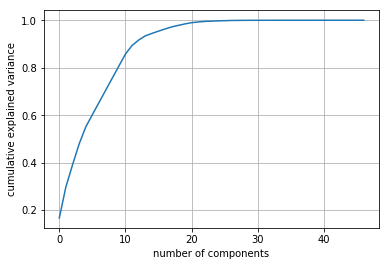

In [26]:
from sklearn.decomposition import PCA

X = data_enc.drop('target', axis=1).values

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()


I see, I would need at lest 20 components to retain nearly 100% of information. Thi s simple trick reduced number of features to half. If I am OK with choosing lower threshold (85%, I could cut components down to 10 features).

In [27]:
pca = PCA(20)
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(565080, 47)
(565080, 20)


In [27]:
projected


array([[-0.16650116,  0.06954915,  0.68516326, ..., -0.33126205,
        -0.0770765 , -0.44768297],
       [-2.96027019, -1.01759818,  1.86252079, ...,  0.20630731,
         0.17905011, -0.05973054],
       [ 0.7894511 , -0.61184063, -0.22602581, ...,  0.25987498,
        -0.01965622,  0.07229937],
       ...,
       [ 0.97405314,  0.41663889, -0.27121863, ..., -0.77346939,
        -0.31646657,  0.10211228],
       [-2.07174792,  1.52197032,  0.54378188, ...,  0.19551113,
         0.02631122, -0.15906963],
       [ 0.05252672, -1.72966415,  0.43449962, ...,  0.13201831,
         0.12506985, -0.04781026]])

I will call this step during pipeline crteation.

#### Experiment to see how dimension reductions influences data

Lets do experiment and reduce data to two dimensional space, to see data shale (Same result could be obtained by using two arbitrary chosem features from 10 dimensional feature space).

In [32]:
X = data_enc.drop('target', axis=1).values

pca = PCA(n_components=2)
experimented = pca.fit_transform(X)

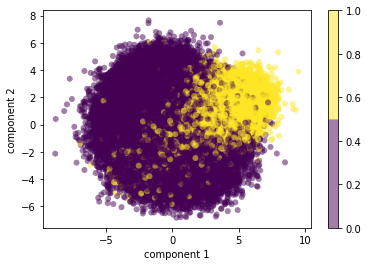

In [33]:
plt.scatter(experimented[:, 0], experimented[:, 1],
            c=data.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

in case of huge information loss we get fairly clear non linear boundry between componen 1 and 2. 

# Learning

In [34]:
y = data_enc['target'].values
X = data_enc.drop('target', axis=1).values

In [35]:
X.shape

(565080, 47)

In [36]:
y.shape

(565080,)

## Gaussian

Just a test to prove SVM was better joice. Naive Bayes is super fast, but is worse, than tossing the coins. 

In [162]:
y = data_enc['target'].values
X = data_enc.drop('target', axis=1).values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, 
                                                    stratify=y)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
yfit = gnb.predict(Xtest)

In [163]:
target_names = ['healthy', 'sick']

print(classification_report(ytest, yfit,
                            target_names=target_names))

             precision    recall  f1-score   support

    healthy       0.98      0.30      0.46     90431
       sick       0.26      0.97      0.41     22585

avg / total       0.84      0.44      0.45    113016



## Kernel SVM

No feature engineering, but reducing number of samples to 1000. All hyperparameters default. RBF kernel.

In [107]:
# Reduce samples
# Select different value to test speed of algorithm training using 17% of data
N_SAMPLES = 20000#len(data)

sample = data.sample(N_SAMPLES)

# I haveto remove all non numerical values. 
X = sample.drop(['feat_14', 'feat_20', 'target'], axis=1).values
y = sample['target'].values

In [108]:
print(X.shape, y.shape)

(20000, 18) (20000,)


In [109]:
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

# Divides data to training and test subgroups.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=42)

svm = SVC(kernel='rbf')

%time svm.fit(Xtrain, ytrain)

yfit = svm.predict(Xtest)

Wall time: 2.22 s


In [110]:
from sklearn.metrics import classification_report

target_names = ['healthy', 'sick']

print(classification_report(ytest, yfit,
                            target_names=target_names))

             precision    recall  f1-score   support

    healthy       0.97      0.99      0.98      4026
       sick       0.98      0.87      0.92       974

avg / total       0.97      0.97      0.97      5000



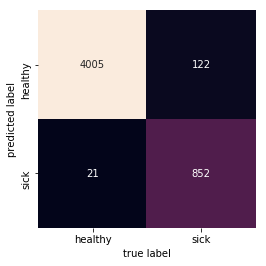

In [111]:
# Confusion matrix to this score
from sklearn.metrics import confusion_matrix
import seaborn as sns
target_names = ['healthy', 'sick']

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Taking small smaple of 1000 examples gave 87% avg accuracy (using F1 score measure). Incrising number of samples leads to very good results, but we are probably overfitting. Taking 100 000 of samples took 53 sec and scored 98% in test data. I suppose model is overfitted due to very uniform numerical features distribution. I can use hyperparametrs tweaking and feature engineering to obtain more generalized one (possibly more information is in cathegorical data. 

**Max time was little bit over 2 years. I limited it to few minutes.**

In [156]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

# taking sample of data
N_SAMPLES = 20000
samples = data_enc.sample(n=N_SAMPLES)

# Split dataset to X <- predictors matrix, y <- class vector
y = samples['target'].values
X = samples.drop('target', axis=1).values

# Divides data to training and test subgroups.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, 
                                                    stratify=y)

# Grid search shall automate scanning basin of attraction of SVM hyperparameters.
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Initialize main processing steps
pca = PCA(20)
svm = SVC(kernel='rbf', random_state=1)


# projected = pca.fit_transform(X)
model = make_pipeline(pca, svm)
# Check different hyper parameter values
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
grid.best_params_


Wall time: 1min 47s


{'svc__C': 50, 'svc__gamma': 0.005}

In [157]:
# Based on best model hyperparameters
model = grid.best_estimator_
y_model = model.predict(X_test)

In [158]:
# If we shuffle data to t10 groups and evaluate algorithm again, we can see, that values are close
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=10)

array([0.97501249, 0.97601199, 0.978     , 0.9745    , 0.9735    ,
       0.976     , 0.975     , 0.978     , 0.97698849, 0.97248624])

In [159]:
from sklearn.metrics import classification_report
target_names = ['healthy', 'sick']
print(classification_report(y_test, y_model,
                            target_names=target_names))

             precision    recall  f1-score   support

    healthy       0.98      0.99      0.98     90431
       sick       0.95      0.91      0.93     22585

avg / total       0.97      0.97      0.97    113016



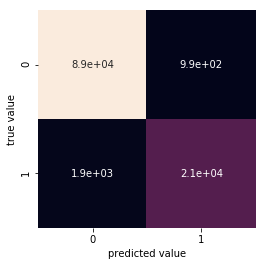

In [160]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### Save model

In [161]:
import os
from sklearn.externals import joblib
filename = os.path.join(os.getcwd(), "svm.pkl")
joblib.dump(model, filename, compress=9)

['C:\\Users\\Michal\\Documents\\IPython\\ml_classifier\\svm.pkl']

## Random Forest


Built on decision trees.

### No data preprocessing

In [168]:
y = data['target'].values
X = data.drop(['target', 'feat_14', 'feat_20'], axis=1).values

In [173]:
from sklearn.ensemble import RandomForestClassifier


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, 
                                                    stratify=y)

forest = RandomForestClassifier(min_samples_split=10)

%time forest.fit(Xtrain, ytrain)

Wall time: 36.3 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [174]:
ypred = forest.predict(Xtest)

In [175]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       0.99      0.96      0.98     92971
          1       0.85      0.96      0.90     20045

avg / total       0.97      0.96      0.96    113016



## With data prep-rocessing

In [126]:
y = data_enc['target'].values
X = data_enc.drop('target', axis=1).values

In [127]:
print(X.shape, y.shape)

(565080, 47) (565080,)


In [146]:
from sklearn.ensemble import RandomForestClassifier


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, 
                                                    stratify=y)


pca = PCA(20)
forest = RandomForestClassifier(min_samples_split=10)
model = make_pipeline(pca, forest)

%time model.fit(Xtrain, ytrain)


# %time forest.fit(Xtrain, ytrain)

Wall time: 49.9 s


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [147]:
ypred = model.predict(Xtest)

In [148]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99     91355
          1       0.94      0.98      0.96     21661

avg / total       0.98      0.98      0.98    113016



Much better than SVM, much faster!

In [155]:
# Save model
import os
from sklearn.externals import joblib
filename = os.path.join(os.getcwd(), "tree.pkl")
joblib.dump(model, filename, compress=9)

['C:\\Users\\Michal\\Documents\\IPython\\ml_classifier\\tree.pkl']

In [131]:
# I can check which feature is most relevant
importances = model.feature_importances_
# sot importances form most relevant
indices = np.argsort(importances)[::-1]

In [ ]:
for f in range(Xtrain.shape[1]):
    print("%2d) %-*s %f" % (f + 1, len(indices), 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

## Neural Netwrork

### This is just tryout of neural network I know this code woll not work. It needs 

In this example, I will use a fully-connected network structure with one hidden layer. Initialize the network weights to a small random number generated from a uniform distribution (‘uniform‘),I will use the rectifier (‘relu‘) activation function on the hidden layer and the sigmoid function in the output layer. Sigmoid on the output is to ensure the network output is between 0 and 1 and easy to map. 


### Network topology

Network topology is dictated by data shape after PCA transformation and Hecht-Nielsen theorem, which states that any continuous function can be represented by a neural
network that has only one hidden layer with exactly $2n + 1$ nodes, where $n$ is the number of input nodes. Other usefull practices in setting hidden layer topology are:

1. Use as many hidden nodes as dimensions (principal components) needed to capture 70-90% of the variance of the input data (10 in this case)
2. hidden layer i should never be more than twice as large as the input layer (somwhere between 20 and 10)
3. For supervized problems upper bound of hidden neurons can be expressed with:

$$N_h = \alpha * \frac{N_s}{N_i + N_o}  $$

$N_i$ = number of input neurons.
$N_o$ = number of output neurons.
$N_s$ = number of samples in training data set.
$\alpha$ = an arbitrary scaling factor usually 2-10.

In my case :

H_h = 2 * (565080 / (20+1)), whic his astronomically high and equal 53816.

I will disregard this rule of thumb

I have 20 inputs to 20 input nodes in one layer, one hidden layer with 15 nodes, and single output layer comprising of single neuron:

20 inputs ->  [15 hidden nodes ] -> 1 output

In [ ]:
### Build network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Work I would do :

1. Rwad data
2. perform feature engineering
    - Standardization
    - PCA
3. Do k-fold cross-vlidation
4. Train neural network
5. Optimize topology
6. Check score. 

But, time is up and I need to give back assignment. I think NN wiould not beat Random Forest. It performed extremely well.

My Best,

Michal